In [41]:
import os
import cv2

img_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_0','%06d.png'%0)
img = cv2.imread(img_path)
cv2.imshow('A', img)
cv2.waitKey(0)

cv2.destroyAllWindows() #close the image window

In [42]:
orb = cv2.ORB.create()
kp = orb.detect(image=img)
kp, descriptors = orb.compute(img, kp)

In [43]:
img_with_kp = cv2.drawKeypoints(image=img, keypoints=kp, outImage=img)
cv2.imshow('', img_with_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# load images
img1_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_0','%06d.png'%0)
img1 = cv2.imread(img_path)

img2_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_0','%06d.png'%5)
img2 = cv2.imread(img_path)

# detect keypoints
orb = cv2.ORB.create()
kp1, kp2 = orb.detect([img1, img2])

# visualize
cv2.drawMatches(img1, kp1, img2, kp2)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - drawMatches() missing required argument 'matches1to2' (pos 5)
>  - drawMatches() missing required argument 'matches1to2' (pos 5)
>  - drawMatches() missing required argument 'matches1to2' (pos 5)
>  - drawMatches() missing required argument 'matches1to2' (pos 5)


In [ ]:
img_concat = cv2.vconcat([img1, img2])
cv2.imshow('', img_concat)
cv2.waitKey(0)

32

In [54]:
cv2.KeyPoint.convert(kp) + (img.shape[0], img.shape[1])

array([[ 794.        , 1449.        ],
       [ 778.        , 1399.        ],
       [ 810.        , 1389.        ],
       [1156.        , 1340.        ],
       [1160.        , 1334.        ],
       [ 919.        , 1458.        ],
       [ 594.        , 1374.        ],
       [ 819.        , 1420.        ],
       [ 923.        , 1435.        ],
       [1179.        , 1290.        ],
       [1199.        , 1287.        ],
       [1143.        , 1283.        ],
       [1160.        , 1307.        ],
       [1178.        , 1295.        ],
       [1170.        , 1335.        ],
       [1194.        , 1309.        ],
       [1159.        , 1276.        ],
       [ 988.        , 1412.        ],
       [1165.        , 1322.        ],
       [ 790.        , 1398.        ],
       [1149.        , 1281.        ],
       [ 762.        , 1398.        ],
       [1291.        , 1493.        ],
       [ 817.        , 1384.        ],
       [1171.        , 1294.        ],
       [ 912.        , 14

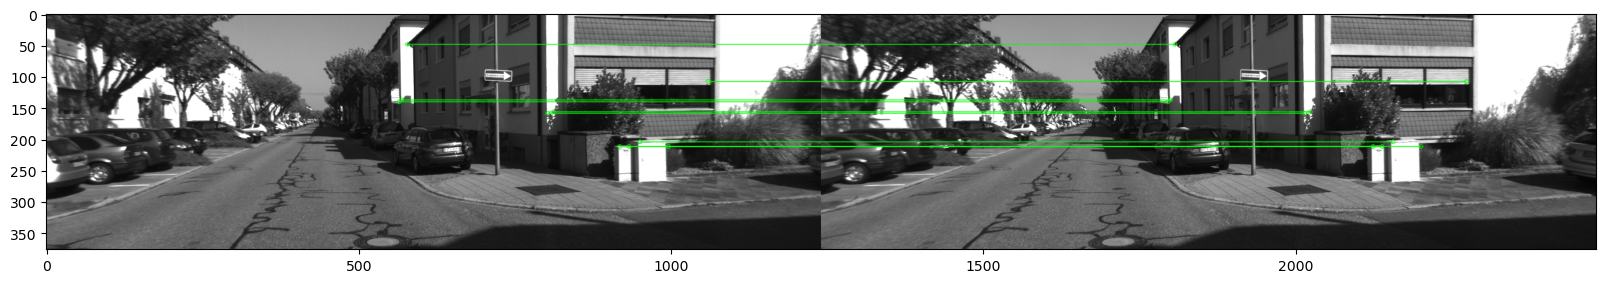

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os 

img1_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_0','%06d.png'%100)
img2_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_1','%06d.png'%100)
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Initiate detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2, matchColor=(0,255,0))
fig = plt.figure(figsize=(20, 10))
plt.imshow(img3)
plt.show()

In [2]:
import pandas as pd
df = pd.read_csv('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\calib.txt', sep=' ', header=None, index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856,0.0,607.1928,0.00000,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P1:,718.856,0.0,607.1928,-386.14480,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P2:,718.856,0.0,607.1928,45.38225,0.0,718.856,185.2157,-0.113089,0.0,0.0,1.0,0.003780
P3:,718.856,0.0,607.1928,-337.28770,0.0,718.856,185.2157,2.369057,0.0,0.0,1.0,0.004915


In [91]:
for x in df.to_numpy().reshape([-1,3,4], order='C'):
    print(np.round(x))

[[719.   0. 607.   0.]
 [  0. 719. 185.   0.]
 [  0.   0.   1.   0.]]
[[ 719.    0.  607. -386.]
 [   0.  719.  185.    0.]
 [   0.    0.    1.    0.]]
[[719.   0. 607.  45.]
 [  0. 719. 185.  -0.]
 [  0.   0.   1.   0.]]
[[ 719.    0.  607. -337.]
 [   0.  719.  185.    2.]
 [   0.    0.    1.    0.]]


In [4]:
class StereoCamera:
    def __init__(self, T_cam_to_img_left, T_cam_to_img_right, baseline):
        # intrinsics
        self.baseline = baseline # in meter
        self.focal_len # in pixels
        self.center # in pixels, in pixel coordinates

    def transform_keypoints_in_camera_coordinates(self, keypoints_left, keypoints_right):
        '''
        Recover the depth from the stereo vision pixels.    

        see: First Principles of Computer Vision - Simple Stereo | Camera Calibration
        https://www.youtube.com/watch?v=hUVyDabn1Mg&t=330s
        '''
        b, c_x, c_y, f_x, f_y = self.baseline, self.center, self.focal_len # alias
        u_l, v_l = cv2.KeyPoint.convert(keypoints_left)
        u_r, v_r = cv2.KeyPoints.convert(keypoints_right)
        
        d = u_l - u_r # disparity
        x = b * (u_l - c_x) / d
        y = b * f_x/f_y * (v_l - c_y) / d
        z = b * f_x / d

        return np.concat([x,y,z], axis=1)




array([[718.856 ,   0.    , 607.1928,   0.    ],
       [  0.    , 718.856 , 185.2157,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]])

H:
 [[ -9.50980206   6.85567308 -44.26249813]
 [  3.19302522  -0.8335447   16.97518661]
 [  8.02440773  -6.41074137  36.15556047]]
det ok: True
R ok: True
T ok: True


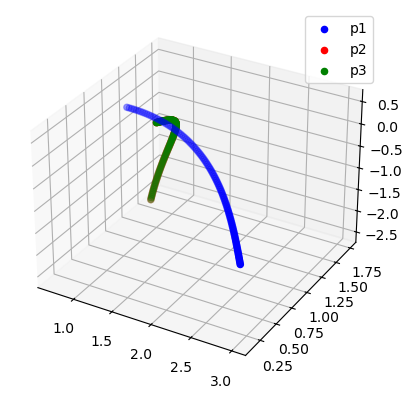

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

p1 = np.zeros((3, 100))
p1[0, :] = np.linspace(1, 3, 100)
p1[1, :] = np.sin(p1[0, :])
p1[2, :] = np.cos(p1[0, :])

# applied Rotation tensor
R = Rotation.from_euler(seq='xyz', angles=[45, 56, 30], degrees=True).as_matrix()
T = np.array([0.1, 0.2, 0.3]).reshape((-1, 1))

p2 = R.dot(p1) + T

p1c = np.mean(p1, axis=1).reshape((-1, 1))
p2c = np.mean(p2, axis=1).reshape((-1, 1))

q1 = p1 - p1c
q2 = p2 - p2c

H = sum([q1[:, i].reshape(-1, 1).dot(q2[:, i].reshape(1, -1))
         for i in range(q1.shape[1])])
print('H:\n', H)

U, _, VT = np.linalg.svd(H)
V = VT.T
R2 = V @ U.T
print('det ok:', np.allclose(np.linalg.det(R2), 1.0))

print('R ok:', np.allclose(R, R2))
T2 = p2c - R @ p1c
print('T ok:', np.allclose(T, T2))

ax.scatter(p1[0, :], p1[1, :], p1[2, :], label='p1', c='b')
ax.scatter(p2[0, :], p2[1, :], p2[2, :], label='p2', c='r')

p3 = R2.dot(p1) + T2
ax.scatter(p3[0, :], p3[1, :], p3[2, :], label='p3', c='g')

ax.legend()
plt.show()

H:
 [[ -9.50980206   6.85567308 -44.26249813]
 [  3.19302522  -0.8335447   16.97518661]
 [  8.02440773  -6.41074137  36.15556047]]
det ok: True
R ok: True
T ok: True


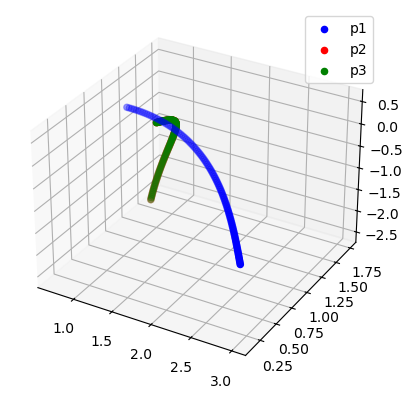

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

p1 = np.zeros((3, 100))
p1[0,:] = np.linspace(1, 3, 100)
p1[1,:] = np.sin(p1[0,:])
p1[2,:] = np.cos(p1[0,:])

# applied Rotation tensor
R = Rotation.from_euler(seq='xyz', angles=[45, 56, 30], degrees=True).as_matrix()
T = np.array([0.1, 0.2, 0.3]).reshape((-1, 1))

p2 = R @ p1 + T

p1c = np.mean(p1, axis=1).reshape((-1, 1))
p2c = np.mean(p2, axis=1).reshape((-1, 1))

q1 = p1 - p1c
q2 = p2 - p2c

H = sum([q1[:, i].reshape(-1, 1).dot(q2[:, i].reshape(1, -1))
         for i in range(q1.shape[1])])
W = np.einsum('ji,ki->jk', q1, q2)

print('H:\n', W)

U, _, VT = np.linalg.svd(W)
V = VT.T
R2 = V @ U.T
print('det ok:', np.allclose(np.linalg.det(R2), 1.0))

print('R ok:', np.allclose(R, R2))
T2 = p2c - R @ p1c
print('T ok:', np.allclose(T, T2))

ax.scatter(p1[0, :], p1[1, :], p1[2, :], label='p1', c='b')
ax.scatter(p2[0, :], p2[1, :], p2[2, :], label='p2', c='r')

p3 = R2.dot(p1) + T2
ax.scatter(p3[0, :], p3[1, :], p3[2, :], label='p3', c='g')

ax.legend()
plt.show()